# PROJECT NAME :PRCP-1004-Fifa20

# PROJECT TEAM ID : PTID-CDS-FEB-23-1476

# PROBLEM STATEMENT :

#### Task 1:-Prepare a complete data analysis report on the given data.
#### Task 2:- Explore football skills and cluster football players based on their attributes.
#### Task3:- Explore the data and attempt all the below asked questions in a step by step manner:
#### ● Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level? 
#### ● Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?

#### ● Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger?

# Aim of the Project:
   The aim of the project is to cluster them based on using their whole skillset.

# Data Information:
   FIFA 20 Football is arguably the most popular sport in the world and FIFA is the most popular football (soccer)  simulation game by Electronic Arts (EA Sports).

# Problem:
   The Information thart's bean provided includes the players data for the Career Mode from FIFA 15 to FIFA 20. The data allows multiple comparisons of the same players across the last 6 versions of the videogame

# IMPORTING LIBRARIES

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

## Loading the dataset

In [3]:
# Here, We are loading the dataset by using the pandas

df=pd.read_csv('players_20.csv')
df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


# Domain  Analysis:

# What is FIFA?

The Federation International Football Association is the international governing body of association football, beach soccer, and futsal. It was founded in 1904 to oversee international competition among the national associations of Belgium, Denmark, France, Germany, the Netherlands, Spain, Sweden and Switzerland. Headquartered in Zürich, Switzerland, its membership now comprises 211 national associations. 

These national associations must each also be members of one of the six regional confederations into which the world is divided: CAF (Africa), AFC (Asia and Australia), UEFA (Europe), CONCACAF (North & Central America and the Caribbean), OFC (Oceania) and CONMEBOL (South America).

## Columns in dataset:

## Name:
   Name of the player. 
## Age: 
   Age of the player.
## Height: 
   Height of the player in inches (transformed to centimeters in preprocessing).
## Over All: 
   General performance quality and value of the player representing the key positional skills and international reputation rated between 1-99.Overall attribute is used only in preprocessing and discussion stages because using it in modelling could lead to domination by this feature.
   
   The aim of the project is not basically sort and categorize the players using their overall talent and international reputation,but to cluster them based on using their whole skillset.
## Potential: 
   Maximum Overall rating expected to be reached by a player in the top of his career rated between 1-99.
## Preferred Foot:
   Right or Left. Label encoder is applied as 0 for left and 1 for right.
## Weak Foot:
   Represents how well a player uses his weak foot (e.g. left for righties) rated between 1 to 5.
## Work Rate:
   Degree of the effort the player puts in terms of attack and defense rated as low,medium and high.This feature is divided into two new features as AttackWorkRate and DefenseWorkRate.Besides,label encoder is applied as 0 for low,0.5 for medium and 1 for high.
## Position:
   Position of the players on the pitch which determines their roles and responsibilities in the team.Forward positions in the football and FIFA 19 can be grouped as striker,forward and winger.The word forward is used both as a general term and a special position.
   
   Strikers are positioned in front of forwards and wingers and very closed to the opposing goal.Their main responsibilities are attacking and scoring goals,that’s why their ball control,shooting and finishing skills are expected to be well.
   
   Center forwards are positioned right behind the strikers.They are expected to receive balls from the others and score assists to the others or goals.In addition to the skills expected from strikers,they have to be good at passing.
   
   Right forwards and left forwards are positioned at the right and left of the center forwards with the same expectations. 

   Wingers are positioned near the touchlines to create chances for strikers and forwards from the right and left side of the field by breakthrough and crosses and to score goals.They are expected to be good at dribbling,acceleration,passing and crossing.Positions are used only in preprocessing and discussion stages. 
## Center Striker(ST):
   Positional skill. Player’s general ability when playing in ST position rated between 1-99.
## Right Striker(RS):
   Positional skill. Player’s general ability when playing in in RS position rated between 1-99.
## Left Striker(LS):
   Positional skill. Player’s general ability when playing in in LS position rated between 1-99.
## Center Forward(CF):
   Positional skill. Player’s general ability when playing in in CF position rated between 1-99.
## Right Forward(RF):
   Positional skill. Player’s general ability when playing in in RF position rated between 1-99.
## Left Forward(LF):
   Positional skill. Player’s general ability when playing in in LF position rated between 1-99.
## Right Winger(RW):
   Positional skill. Player’s general ability when playing in in RW position rated between 1-99.
## Left Winger(LW):
   Positional skill. Player’s general ability when playing in in LW position rated between 1-99.
## Crossing:
   Crossing skill of the player rated between 1-99. Cross is a long-range pass from wings to center.
## Finishing:
   Finishing skill of the player rated between 1-99. Finishing in football refers to finish an attack by scoring a goal.
## HeadingAccuracy:
   Player’s accuracy to pass or shoot by using his head rated between 1-99.
## ShortPassing:
   Player’s accuracy for short passes rated between 1-99.
## LongPassing:
   Player’s accuracy for long passes rated between 1-99.
## Dribbling:
   Dribbling skill of the player rated between 1-99. Dribbling is carrying the ball without losing while moving in one  particular direction.
## SprintSpeed:
   Speed rate of the player rated between 1-99.
## Acceleration:
   Shows how fast a player can reach his maximum sprint speed rated between 1-99.
## FKAccuracy:
   Player’s accuracy to score free kick goals rated between 1-99.
## BallControl:
   Player’s ability to control the ball rated between 1-99.
## Balance:
   Player’s ability to remain steady while running, carrying and controlling the ball rated between 1-99.
## ShotPower:
   Player’s strength level of shooting the ball rated between 1-99.
## Jumping:
   Player’s jumping skill rated between 1-99.
## Penalties:
   Player’s accuracy to score goals from penalty rated between 1-99.
## Strength:
   Physical strength of the player rated between 1-99.
## Agility:
   Gracefulness and quickness of the player while controlling the ball rated between 1-99.
## Reactions:
   Acting speed of the player to what happens in his environment rated between 1-99.
## Aggression:
   Aggression level of the player while pushing, pulling and tackling rated between 1-99.
## Positioning:
   Player’s ability to place himself in the right position to receive the ball or score goals rated between 1-99.
## Vision:
   Player’s mental awareness about the other players in the team for passing rated between 1-99.
## Volleys:
   Player’s ability to perform volleys rated between 1-99.
## LongShots:
   Player’s accuracy of shoots from long distances rated between 1-99.
## Stamina:
   Player’s ability to sustain his stamina level during the match rated between 1-99.Players with lower stamina get tired fast.
## Composure:
   Player’s ability to control his calmness and frustration during the match rated between 1-99.
## Curve:
   Player’s ability to curve the ball while passing or shooting rated between 1-99.
## Interceptions:
   Player’s ability to intercept the ball while opposite team’s players are passing rated between 1-99.It is a defensive skill.
## StandingTackle:
   Player’s ability to perform tackle (take the ball from the opposite player) while standing rated between 1-99.It is a defensive skill.
## SlidingTackle:
   Player’s ability to perform tackle by sliding rated between 1-99. It is a defensive skill.
## Marking:
   Player’s ability to apply strategies to prevent opposing team from taking the ball rated between 1-99.It is a defensive skill.

# Basic Checks:

In [4]:
# Basic information about the dataset

df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 104 columns):
 #    Column                      Dtype  
---   ------                      -----  
 0    sofifa_id                   int64  
 1    player_url                  object 
 2    short_name                  object 
 3    long_name                   object 
 4    age                         int64  
 5    dob                         object 
 6    height_cm                   int64  
 7    weight_kg                   int64  
 8    nationality                 object 
 9    club                        object 
 10   overall                     int64  
 11   potential                   int64  
 12   value_eur                   int64  
 13   wage_eur                    int64  
 14   player_positions            object 
 15   preferred_foot              object 
 16   international_reputation    int64  
 17   weak_foot                   int64  
 18   skill_moves                 int64  
 19   wo

In [5]:
# Displaying the first 5 rows of the dataset using the 'head()' function.

df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [6]:
# Displaying the last 5 rows of the dataset using the 'tail()' function.

df.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,...,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [7]:
# Printing all the column names from the dataset

df.columns.tolist()

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

In [8]:
# Printing the number of rows and columns using the "shape()" function

df.shape

(18278, 104)

In [9]:
# Getting Statistical data from the dataset

df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [10]:
# Getting all the columns that have null values.

df.columns[df.isnull().any()].tolist()

['release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb']

<li> The above shown columns have null values in them.

In [11]:
# Checking for null values

df.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [12]:
# It will discribe all the characters

df.describe(include=['O'])

,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,18278,18278,18278,18278,18278,18278,18278,18278,18278,18278,...,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242
unique,18278,17354,18218,6142,162,698,643,2,9,10,...,98,98,98,98,98,96,110,110,110,96
top,https://sofifa.com/player/158023/lionel-messi/...,J. Rodríguez,Liam Kelly,1992-02-29,England,FC Barcelona,CB,Right,Medium/Medium,Normal,...,59+2,59+2,59+2,59+2,59+2,61+2,63+2,63+2,63+2,61+2
freq,1,11,3,113,1667,33,2322,13960,9875,10750,...,682,636,636,636,682,667,621,621,621,667


In [13]:
# checking for the duplicated values

df.loc[df.duplicated()]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb


<li> There are no duplicated rows.

In [14]:
df['nationality'].value_counts()

England                1667
Germany                1216
Spain                  1035
France                  984
Argentina               886
                       ... 
Liberia                   1
São Tomé & Príncipe       1
Puerto Rico               1
Bahrain                   1
Indonesia                 1
Name: nationality, Length: 162, dtype: int64

In [15]:
# Checking the nationality of the players(Top 10)

df['nationality'].value_counts()[0:10]

England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: nationality, dtype: int64

<li> Majority of the palyers are from England then followed by Germany and so on.

In [16]:
# Checking the value counts of the team positions.

df['team_position'].value_counts()

SUB    7820
RES    2958
GK      662
RCB     660
LCB     660
RB      560
LB      560
ST      458
RCM     411
LCM     411
RM      399
LM      398
CAM     311
RDM     244
LDM     242
RS      195
LS      195
CDM     181
LW      162
RW      161
CB      100
CM       76
RWB      58
LWB      58
RAM      23
LAM      23
RF       19
LF       19
CF       14
Name: team_position, dtype: int64

In [17]:
# Checking the preferred foot of most of the players.

df["preferred_foot"].value_counts()

Right    13960
Left      4318
Name: preferred_foot, dtype: int64

In [18]:
# Getting the players and their wages.

player_sal = df[['short_name','wage_eur']]
player_sal

,short_name,wage_eur
0,L. Messi,565000
1,Cristiano Ronaldo,405000
2,Neymar Jr,290000
3,J. Oblak,125000
4,E. Hazard,470000
...,...,...
18273,Shao Shuai,2000
18274,Xiao Mingjie,2000
18275,Zhang Wei,1000
18276,Wang Haijian,1000


In [19]:
# List of top 10 players getting high wages

player_sal.sort_values(by=['wage_eur'],ascending = False).head(10)

,short_name,wage_eur
0,L. Messi,565000
4,E. Hazard,470000
1,Cristiano Ronaldo,405000
5,K. De Bruyne,370000
22,A. Griezmann,370000
19,L. Suárez,355000
8,L. Modrić,340000
36,T. Kroos,330000
17,S. Agüero,300000
21,Sergio Busquets,300000


In [20]:
# Players and their age.

player_age = df[['short_name','age']]
player_age.sort_values(by=['age'],ascending = False)

,short_name,age
13003,H. Sulaimani,42
11832,C. Muñoz,42
200,G. Buffon,41
3706,C. Lucchetti,41
10665,F. Kippe,41
...,...,...
17782,S. Anderson,16
17614,D. Obbekjær,16
12160,S. Esposito,16
6630,Fábio Silva,16


# Exploratory Data Analysis

## Univariate Analysis

In [21]:
import sweetviz as sv 
my_report = sv.analyze(df)
my_report.show_html()

  Using cached sweetviz-2.1.4-py3-none-any.whl (15.1 MB)
  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)


                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Insights from the Sweetviz Report.

- Most of the players belong to the England country i.e; 1667(9%) in total players list.   
- Most of the players belong to age group between 20 to 25 years.   
- Each club has atleast 1% i.e; 33 players from dataset given.     
- Almost 76% of players i.e; 13960 players prefer to play with the right foot.   
- 13% of players i.e;2,322 are center back and 11% players i.e;2,036 belong goalkeeper postions.   
- 92% players are internationally known players.   
- More 9o% of players are paid betwwen the range of 5k to 100k.    
- Almost like 47% of players have moving skills between each other.  
- Most of the players belong to the sub categories in the team position.   
- Every player plays for the club.   
- Players have the work rate of 54% in MEDIUM/MEDIUM.   
- There are less number of players between age of 30 to 40 which indicates that more young players are given more preference.
- Strikers(ST) have the higest overall rating indicating that they have more highly rated players.
- Attacking Midfielders(CAM) also have the highest overall ratings along with the ST showing that it also has the highly rated players.
- Goalkeepers have the lowest overall ratings compared to outfield players.

# List of top 10 countries with most players

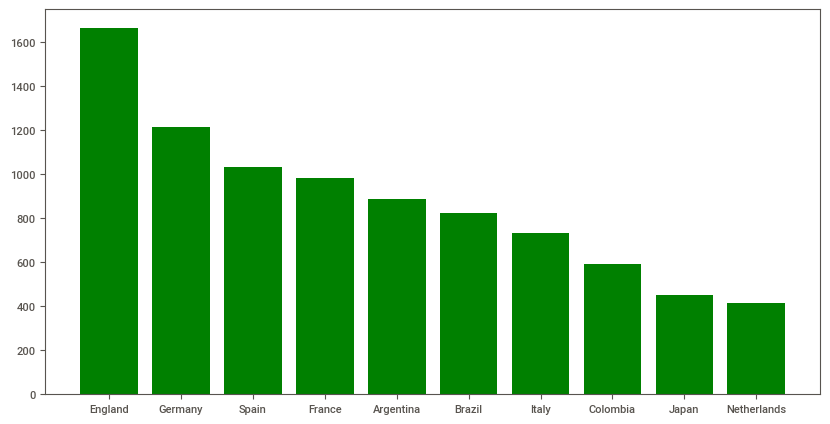

In [23]:
# Using bar plot to show the top 10 countries where most of the playes come from.

plt.figure(figsize=(10,5))
plt.bar(list(df['nationality'].value_counts()[0:10].keys()),list(df['nationality'].value_counts()[0:10]),color='g')
plt.show()

### According to the FIFA 20 dataset, the top 10 countries with the most players are:

<li> 1)England
<li> 2)Germany
<li> 3)Spain
<li> 4)Brazil
<li> 5)Argentina
<li> 6)France
<li> 7)Italy
<li> 8)Colombia
<li> 9)Mexico
<li>10)Netherlands

 England has the most players in FIFA 20, followed by Germany and Spain. It's worth noting that these countries have long histories of producing high-quality footballers and investing in football development programs. Additionally, these countries often have strong domestic leagues that attract and develop top talent. Other factors, such as population size, cultural affinity for football, and geopolitical factors, may also play a role in determining which countries produce the most footballers at this level.

# Bivariate Analysis

# List of top 10 players getting high wages

<BarContainer object of 11 artists>

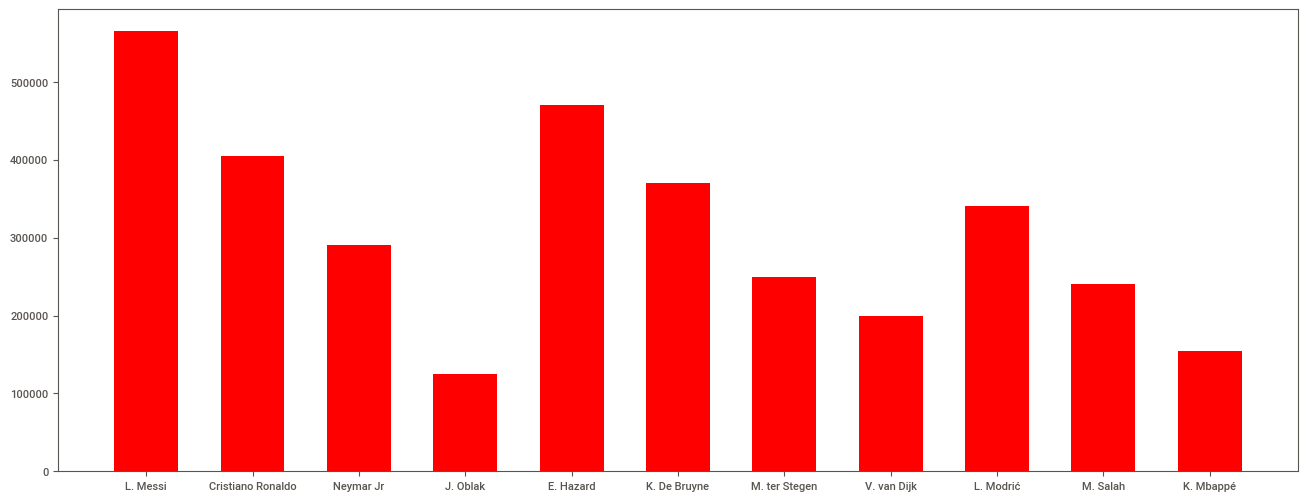

In [24]:
plt.figure(figsize=(16,6))
plt.bar(list(player_sal['short_name'])[0:11],list(player_sal['wage_eur'])[0:11], color='r', width = 0.6)

### According to the FIFA 20 dataset, the top 10 players with the highest wages are:

<li> 1)Lionel Messi
<li> 2)Cristiano Ronaldo
<li> 3)Neymar Jr.
<li> 4)Jan Oblak
<li> 5)Kevin De Bruyne
<li> 6)Eden Hazard
<li> 7)Luis Suárez
<li> 8)Sergio Agüero
<li> 9)Antoine Griezmann
<li> 10)Giorgio Chiellini
    
 It's worth noting that these players are some of the most highly skilled and successful footballers in the world, and they often play for top-tier clubs that can afford to pay them high salaries. Additionally, factors such as commercial    endorsements, image rights, and bonuses may also contribute to their overall earnings.

# Age Segregation

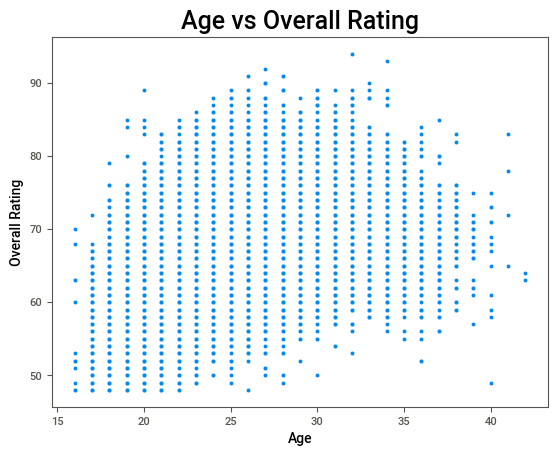

In [25]:
#### Overall rating vs. age of players
sns.scatterplot(x='age',y='overall',data = df)
plt.title('Age vs Overall Rating',fontsize=18)
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()

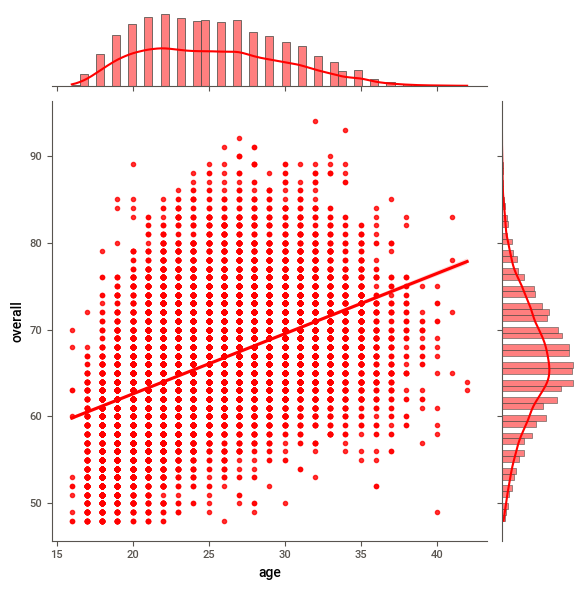

In [26]:
sns.jointplot(y='overall',x='age',data=df,kind='reg',color='red')
plt.show()

<li>From the above chart we can interpret that players stops improving at the age of 27 and their rating gradually starts decreasing.

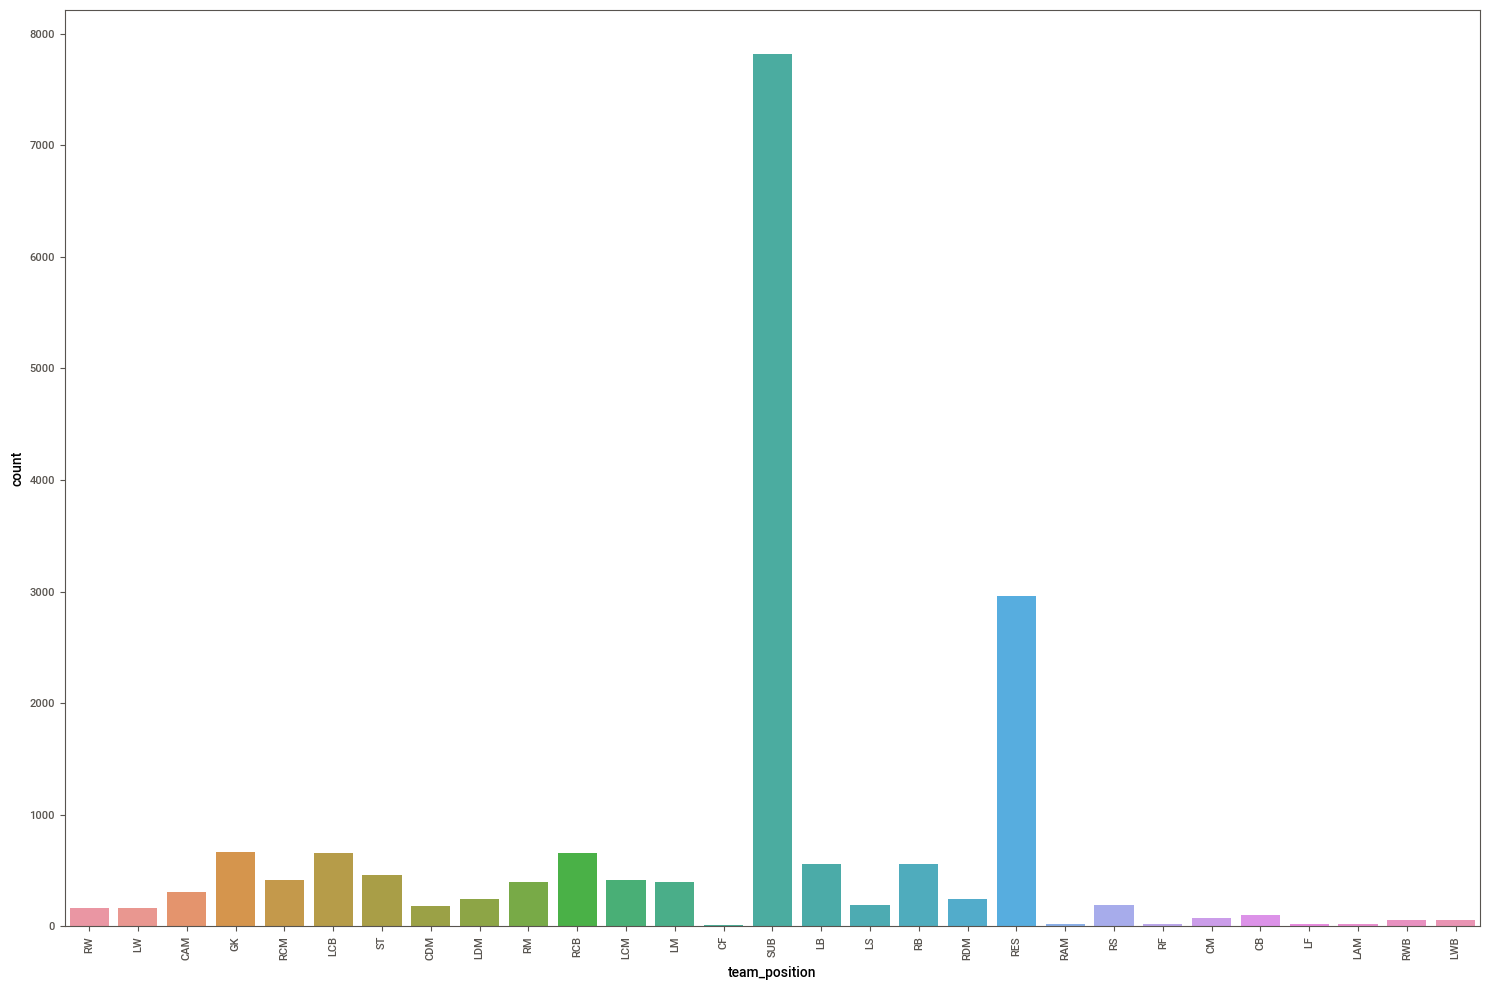

In [27]:
plt.figure(figsize=(15,10))
chart=sns.countplot(x=df['team_position'],data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.tight_layout()

<li>The counts of substitute players in the team position is 7820, after that the reserve comes to 2958 and so on.

# Offensive Player that tends tto get paid most: ST,LW,RW

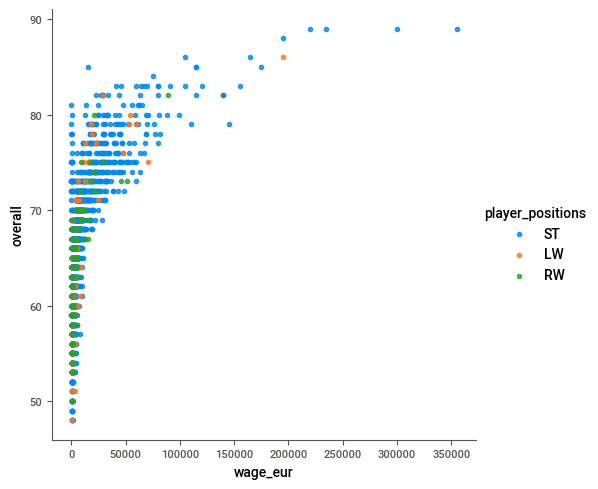

In [28]:
sns.lmplot(x='wage_eur', y='overall', hue='player_positions', 
           data=df.loc[df['player_positions'].isin(['ST', 'RW', 'LW'])], 
           fit_reg=False)

<li>From the above chart we can deduce that the ofensive players who tends to get paid the most belongs to the ST(Striker) class.

# Data Preprocessing

In [29]:
# Removing the unnecessary columns
df.drop(['sofifa_id','player_url','dob','long_name'], axis = 1, inplace = True) 

In [30]:
# Filling null values with zero
fifa=df.fillna(value=0)
fifa

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,...,0,0,0,0,0,0,0,0,0,0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,22,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,Xiao Mingjie,22,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,Zhang Wei,19,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,Wang Haijian,18,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [31]:
fifa.isnull().sum()

short_name     0
age            0
height_cm      0
weight_kg      0
nationality    0
              ..
lb             0
lcb            0
cb             0
rcb            0
rb             0
Length: 100, dtype: int64

<li>No null values present in the dataset.

In [32]:
fifa1=fifa[['short_name','age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur','club','nationality',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'release_clause_eur', 'team_jersey_number', 'contract_valid_until',
       'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]

In [33]:
fifa1

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,club,nationality,wage_eur,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,FC Barcelona,Argentina,565000,...,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,Juventus,Portugal,405000,...,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,Paris Saint-Germain,Brazil,290000,...,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,Atlético Madrid,Slovenia,125000,...,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,Real Madrid,Belgium,470000,...,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,22,186,79,48,56,40000,Beijing Renhe FC,China PR,2000,...,39,41,45,50,52,5,5,13,5,14
18274,Xiao Mingjie,22,177,66,48,56,40000,Shanghai SIPG FC,China PR,2000,...,37,35,42,53,57,13,6,14,11,9
18275,Zhang Wei,19,186,75,48,56,40000,Hebei China Fortune FC,China PR,1000,...,36,39,46,52,46,7,8,10,6,14
18276,Wang Haijian,18,185,74,48,54,40000,Shanghai Greenland Shenhua FC,China PR,1000,...,36,40,39,44,54,14,9,13,13,13


In [34]:
# filtering dataset the players with an overall rating greater than 86.
fifa1=fifa1[fifa1.overall>86]
fifa1

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,club,nationality,wage_eur,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,FC Barcelona,Argentina,565000,...,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,Juventus,Portugal,405000,...,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,Paris Saint-Germain,Brazil,290000,...,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,Atlético Madrid,Slovenia,125000,...,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,Real Madrid,Belgium,470000,...,88,91,34,27,22,11,12,6,8,8
5,K. De Bruyne,28,181,70,91,91,90000000,Manchester City,Belgium,370000,...,79,91,68,58,51,15,13,5,10,13
6,M. ter Stegen,27,187,85,90,93,67500000,FC Barcelona,Germany,250000,...,25,70,25,13,10,88,85,88,88,90
7,V. van Dijk,27,193,92,90,91,78000000,Liverpool,Netherlands,200000,...,62,89,91,92,85,13,10,13,11,11
8,L. Modrić,33,172,66,90,90,45000000,Real Madrid,Croatia,340000,...,82,92,68,76,71,13,9,7,14,9
9,M. Salah,27,175,71,90,90,80500000,Liverpool,Egypt,240000,...,77,91,38,43,41,14,14,9,11,14


In [35]:
#Saving names
names=fifa1.short_name.tolist()
clubs=fifa1.club.tolist()
nationality=fifa1.nationality.tolist()
fifa1=fifa1.drop(['short_name','club','nationality'],axis=1)

In [36]:
fifa1.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,...,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,...,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,5,5,5,...,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,3,3,1,...,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,4,4,4,...,88,91,34,27,22,11,12,6,8,8


## Finding Outliers

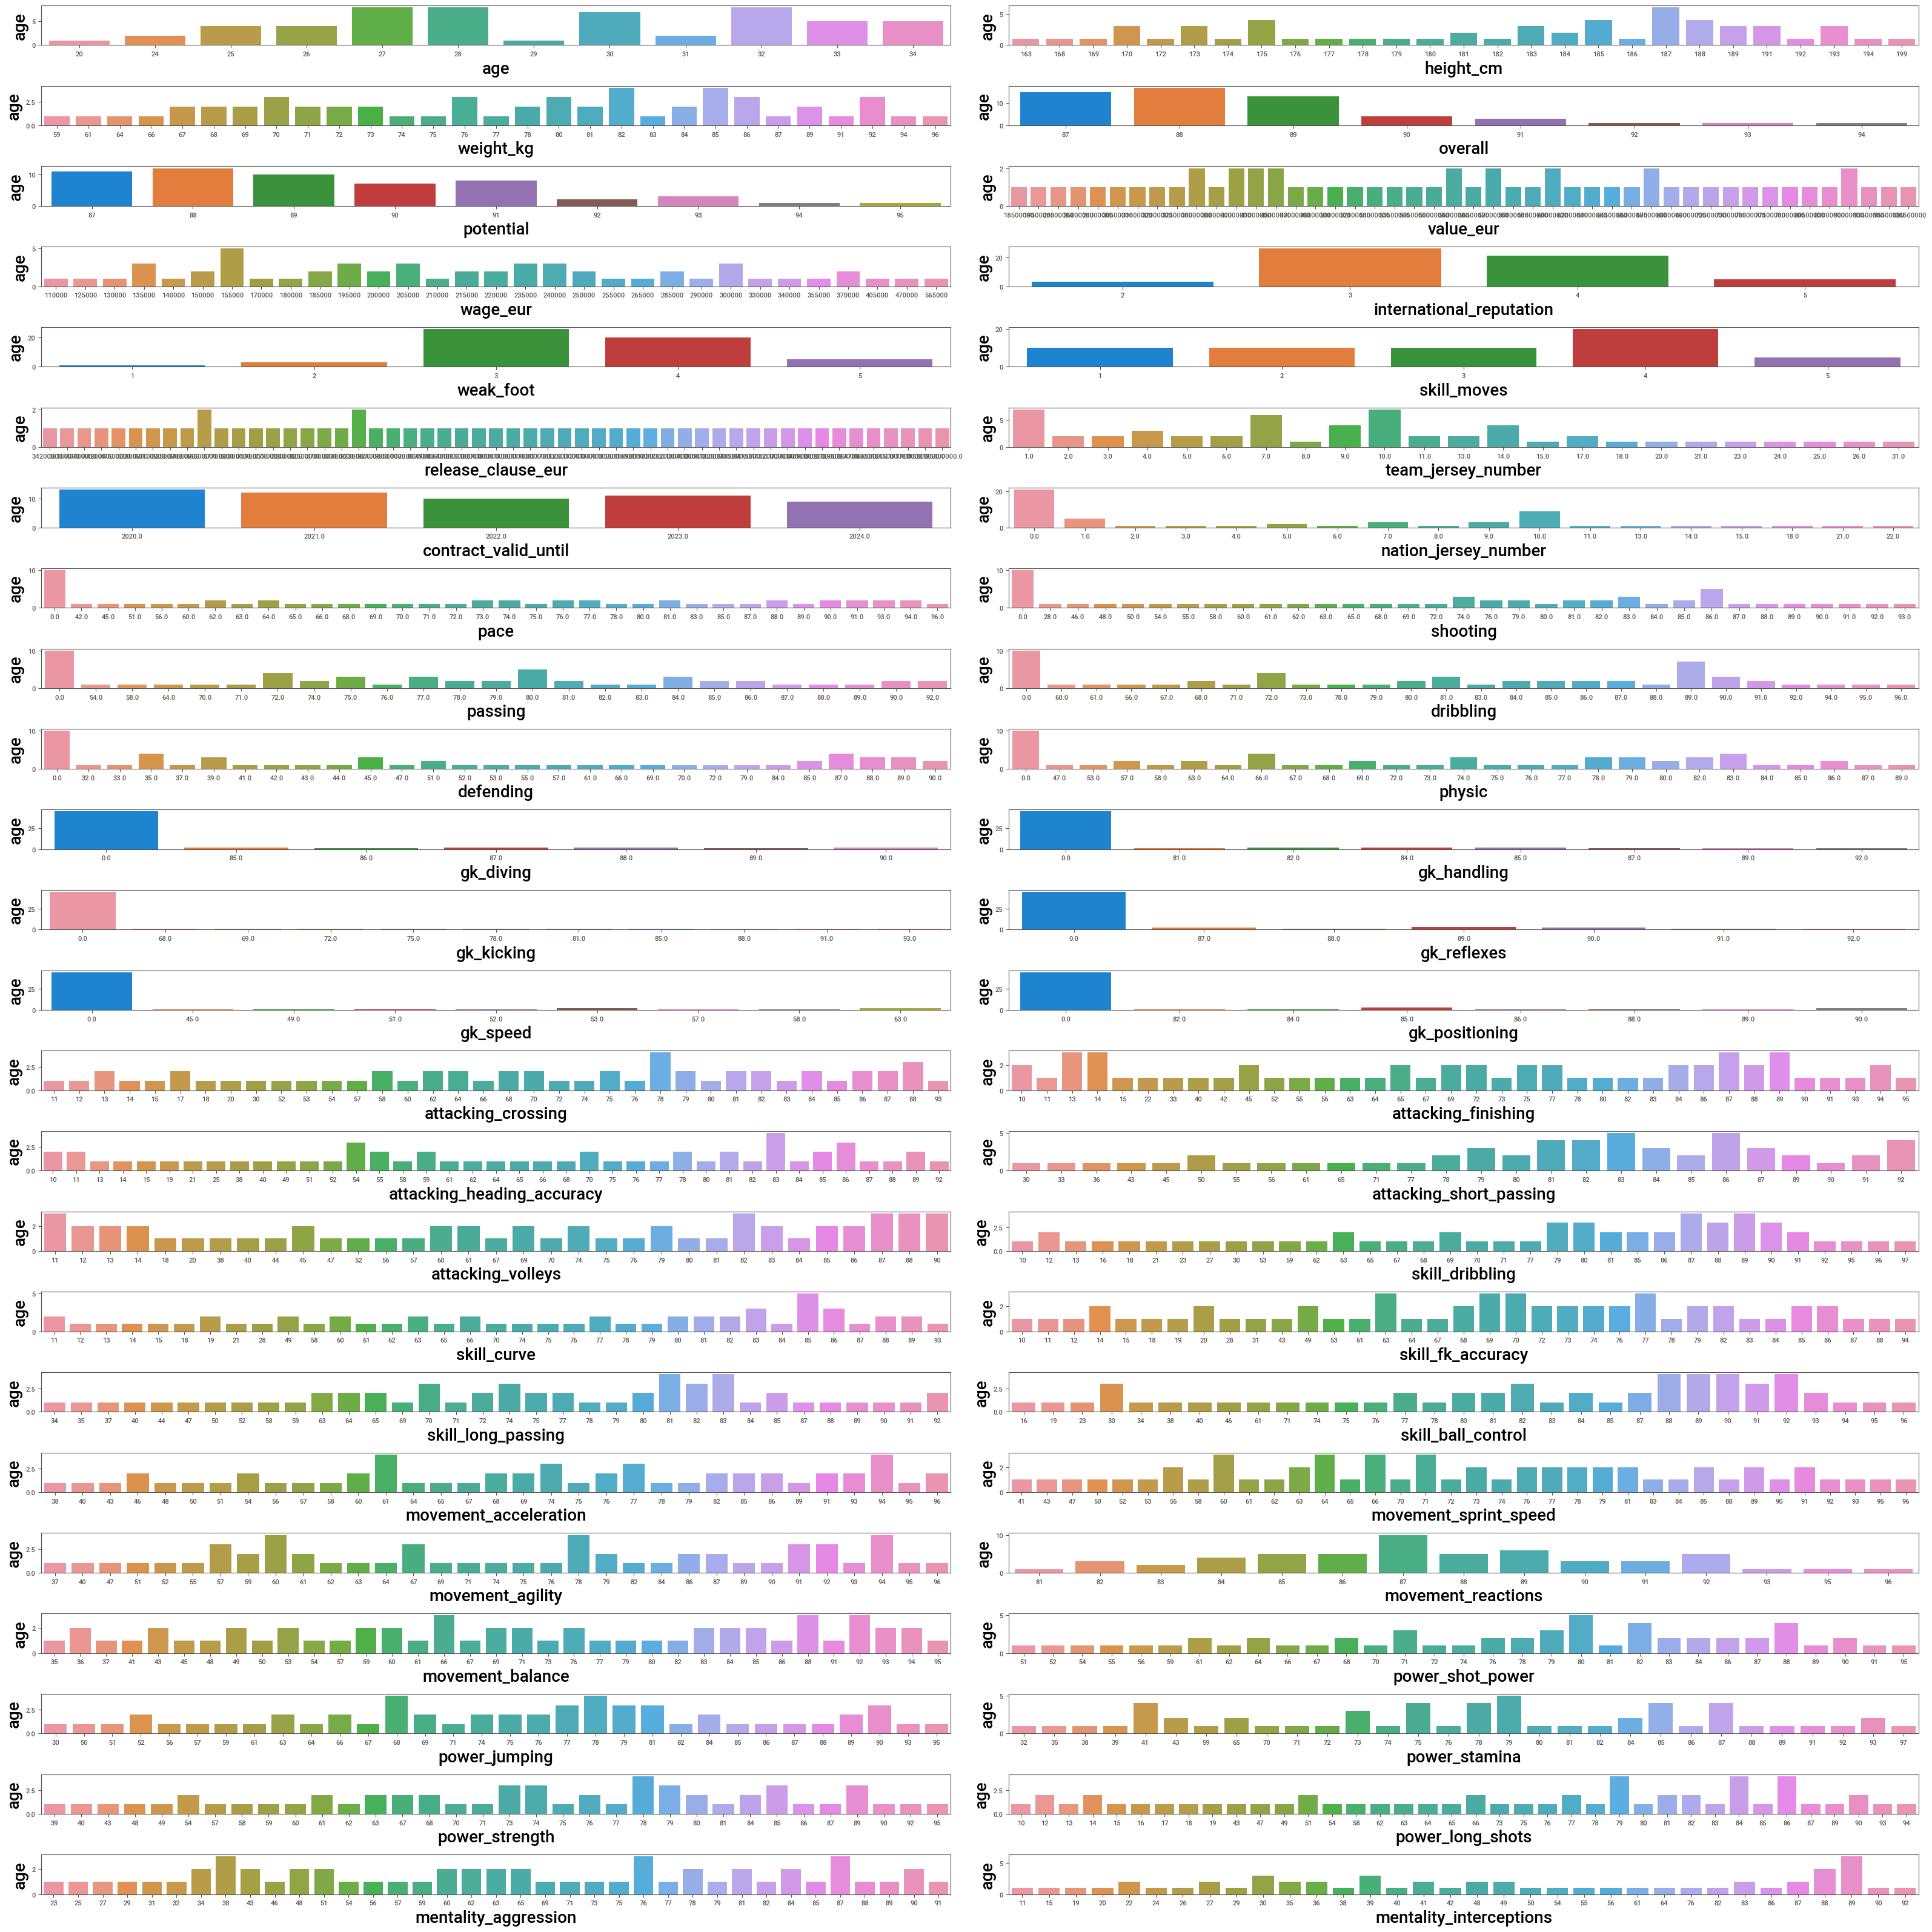

In [37]:
## Visualize summary of the distribution of values in each column of the fifa1 dataset, which can help identify any patterns or outliers

plt.figure(figsize=(32,32))
plotnumber=1
for i in fifa1:
    if plotnumber<=48:
        ax=plt.subplot(24,2,plotnumber)
        sns.countplot(x=fifa1[i].dropna(axis=0))
        plt.xlabel(i,fontsize=20)
        plt.ylabel('age',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Scalling

In [38]:
## Normalize and scaling to process the all values scaled between 0 and 1.
x=fifa1.values
from sklearn.preprocessing import MinMaxScaler
scaled=MinMaxScaler()
x_scaled=scaled.fit_transform(x)
x_norm=pd.DataFrame(x_scaled)
x_norm

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.857143,0.194444,0.351351,1.000000,0.875,0.885057,1.000000,1.000000,0.75,0.75,...,0.810127,1.000000,0.227848,0.329268,0.219512,0.034483,0.089888,0.142857,0.116279,0.056180
1,1.000000,0.666667,0.648649,0.857143,0.750,0.459770,0.648352,1.000000,0.75,1.00,...,0.936709,0.967742,0.164557,0.268293,0.195122,0.045977,0.089888,0.142857,0.116279,0.089888
2,0.500000,0.333333,0.243243,0.714286,0.625,1.000000,0.395604,1.000000,1.00,1.00,...,1.000000,0.935484,0.151899,0.195122,0.256098,0.068966,0.067416,0.142857,0.127907,0.089888
3,0.428571,0.694444,0.756757,0.571429,0.750,0.678161,0.032967,0.333333,0.50,0.00,...,0.000000,0.096774,0.151899,0.024390,0.121951,0.965517,1.000000,0.835165,1.000000,0.966292
4,0.571429,0.333333,0.405405,0.571429,0.500,0.821839,0.791209,0.666667,0.75,0.75,...,0.974684,0.838710,0.240506,0.207317,0.170732,0.091954,0.101124,0.043956,0.046512,0.056180
5,0.571429,0.500000,0.297297,0.571429,0.500,0.821839,0.571429,0.666667,1.00,0.75,...,0.860759,0.838710,0.670886,0.585366,0.524390,0.137931,0.112360,0.032967,0.069767,0.112360
6,0.500000,0.666667,0.702703,0.428571,0.750,0.563218,0.307692,0.333333,0.75,0.00,...,0.177215,0.161290,0.126582,0.036585,0.024390,0.977011,0.921348,0.945055,0.976744,0.977528
7,0.500000,0.833333,0.891892,0.428571,0.500,0.683908,0.197802,0.333333,0.50,0.25,...,0.645570,0.774194,0.962025,1.000000,0.939024,0.114943,0.078652,0.120879,0.081395,0.089888
8,0.928571,0.250000,0.189189,0.428571,0.375,0.304598,0.505495,0.666667,0.75,0.75,...,0.898734,0.870968,0.670886,0.804878,0.768293,0.114943,0.067416,0.054945,0.116279,0.067416
9,0.500000,0.333333,0.324324,0.428571,0.375,0.712644,0.285714,0.333333,0.50,0.75,...,0.835443,0.838710,0.291139,0.402439,0.402439,0.126437,0.123596,0.076923,0.081395,0.123596


In [39]:
# PCA is a technique that can be used to reduce the number of variables in a dataset.

from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # retain the first two principal components
reduced=pd.DataFrame(pca.fit_transform(x_norm))
reduced

,0,1
0,-1.417289,-1.325734
1,-1.228235,-0.951181
2,-1.264412,-1.497337
3,3.910919,-0.506003
4,-1.196893,-1.287415
5,-1.324952,-0.477725
6,3.781012,-0.432057
7,-0.511274,1.113887
8,-1.238914,0.025749
9,-1.134775,-0.811077


# Making clustering merge with names,clubs and nationality

In [40]:
pca = PCA(n_components=2)
reduced1=pd.DataFrame(pca.fit_transform(x_norm))
reduced1

,0,1
0,-1.417289,-1.325734
1,-1.228235,-0.951181
2,-1.264412,-1.497337
3,3.910919,-0.506003
4,-1.196893,-1.287415
5,-1.324952,-0.477725
6,3.781012,-0.432057
7,-0.511274,1.113887
8,-1.238914,0.025749
9,-1.134775,-0.811077


In [55]:
# cluster values
cluster=kmeans.labels_.tolist()
cluster

[7,
 0,
 7,
 8,
 7,
 3,
 8,
 2,
 9,
 0,
 0,
 4,
 3,
 8,
 8,
 5,
 4,
 0,
 2,
 3,
 3,
 2,
 3,
 0,
 9,
 8,
 0,
 3,
 1,
 6,
 1,
 1,
 1,
 3,
 5,
 4,
 5,
 3,
 3,
 3,
 6,
 3,
 2,
 3,
 2,
 6,
 3,
 6,
 0,
 6,
 6,
 5,
 9,
 1,
 0]

In [56]:
reduced1['cluster']=cluster
reduced1['names']=names
reduced1['clubs']=clubs
reduced1.columns=['x','y','cluster','names','clubs']
reduced1

,x,y,cluster,names,clubs
0,-1.417289,-1.325734,7,L. Messi,FC Barcelona
1,-1.228235,-0.951181,0,Cristiano Ronaldo,Juventus
2,-1.264412,-1.497337,7,Neymar Jr,Paris Saint-Germain
3,3.910919,-0.506003,8,J. Oblak,Atlético Madrid
4,-1.196893,-1.287415,7,E. Hazard,Real Madrid
5,-1.324952,-0.477725,3,K. De Bruyne,Manchester City
6,3.781012,-0.432057,8,M. ter Stegen,FC Barcelona
7,-0.511274,1.113887,2,V. van Dijk,Liverpool
8,-1.238914,0.025749,9,L. Modrić,Real Madrid
9,-1.134775,-0.811077,0,M. Salah,Liverpool


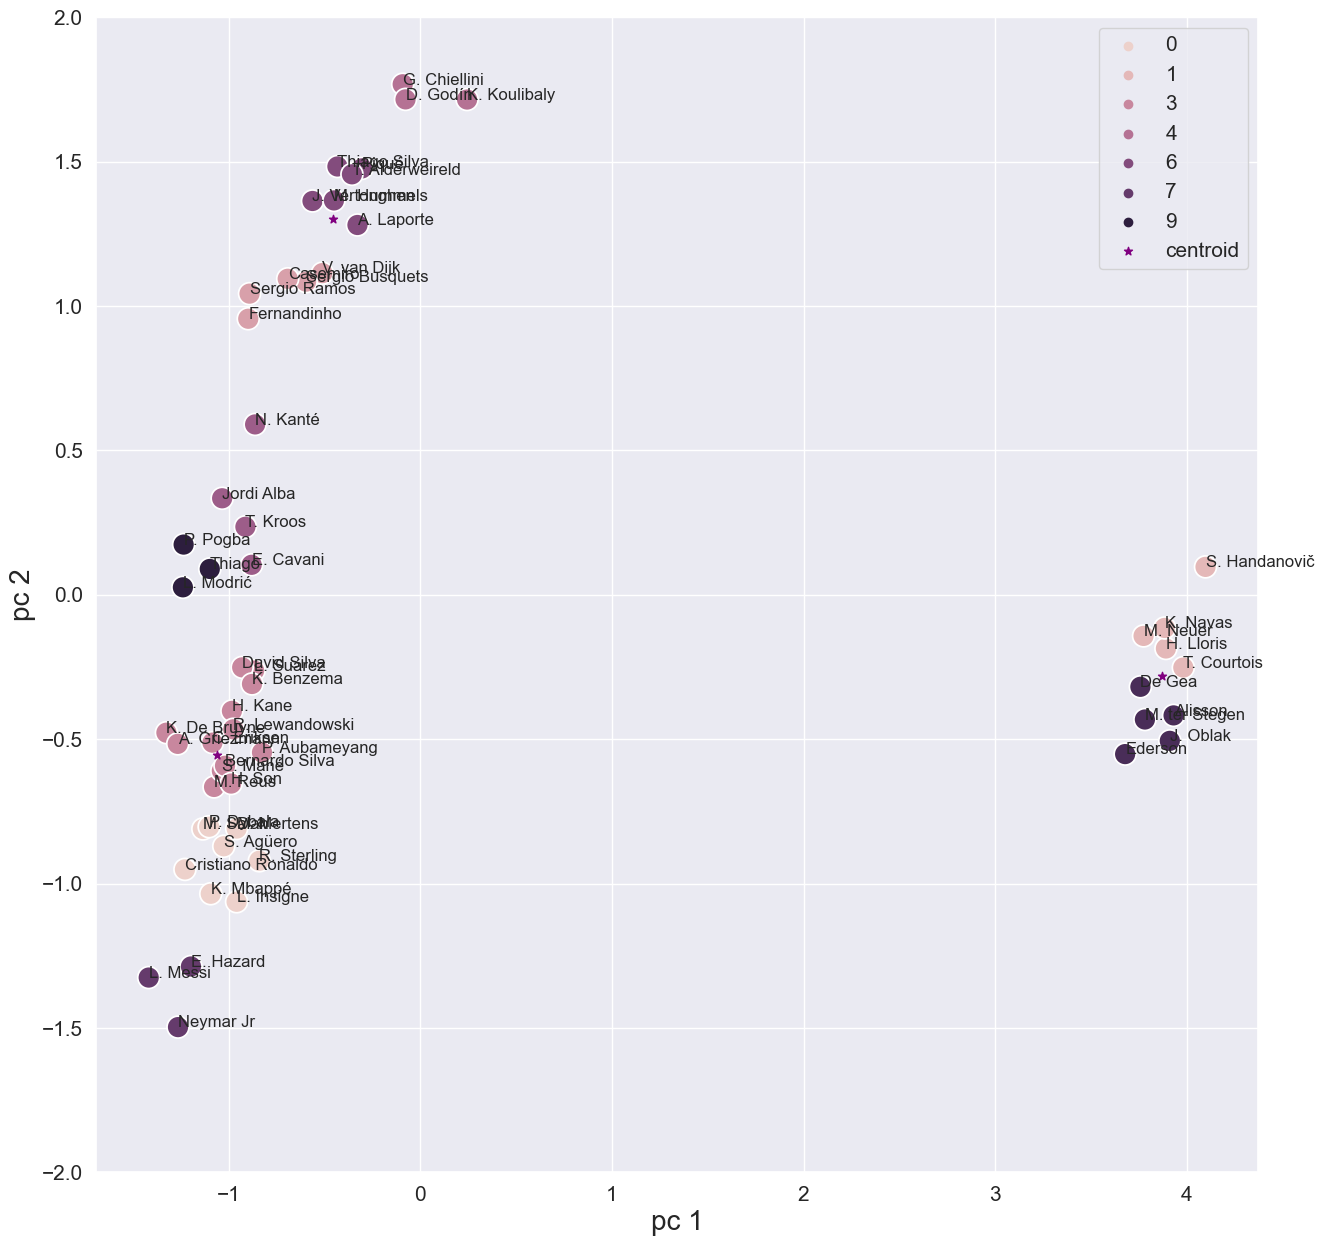

In [57]:
# Visualize the clusters using scatter plots 
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(15, 15))
sns.scatterplot(x='x', y='y', hue='cluster', data=reduced1, s=250, ax=ax)
texts = [plt.text(x, y, s) for x, y, s in zip(reduced1.x, reduced1.y, reduced1.names)]
ax.set(ylim=(-2, 2))
ax.tick_params(labelsize=15)
ax.set_xlabel('pc 1', fontsize=20)
ax.set_ylabel('pc 2', fontsize=20)
plt.scatter(centroids[:, 0], centroids[:, 1], color='purple', marker='*', label='centroid')
plt.legend(fontsize=15)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'FC Barcelona'),
  Text(1, 0, 'Juventus'),
  Text(2, 0, 'Paris Saint-Germain'),
  Text(3, 0, 'Atlético Madrid'),
  Text(4, 0, 'Real Madrid'),
  Text(5, 0, 'Manchester City'),
  Text(6, 0, 'Liverpool'),
  Text(7, 0, 'Napoli'),
  Text(8, 0, 'Tottenham Hotspur'),
  Text(9, 0, 'Manchester United'),
  Text(10, 0, 'Chelsea'),
  Text(11, 0, 'FC Bayern München'),
  Text(12, 0, 'Inter'),
  Text(13, 0, 'Borussia Dortmund'),
  Text(14, 0, 'Arsenal')])

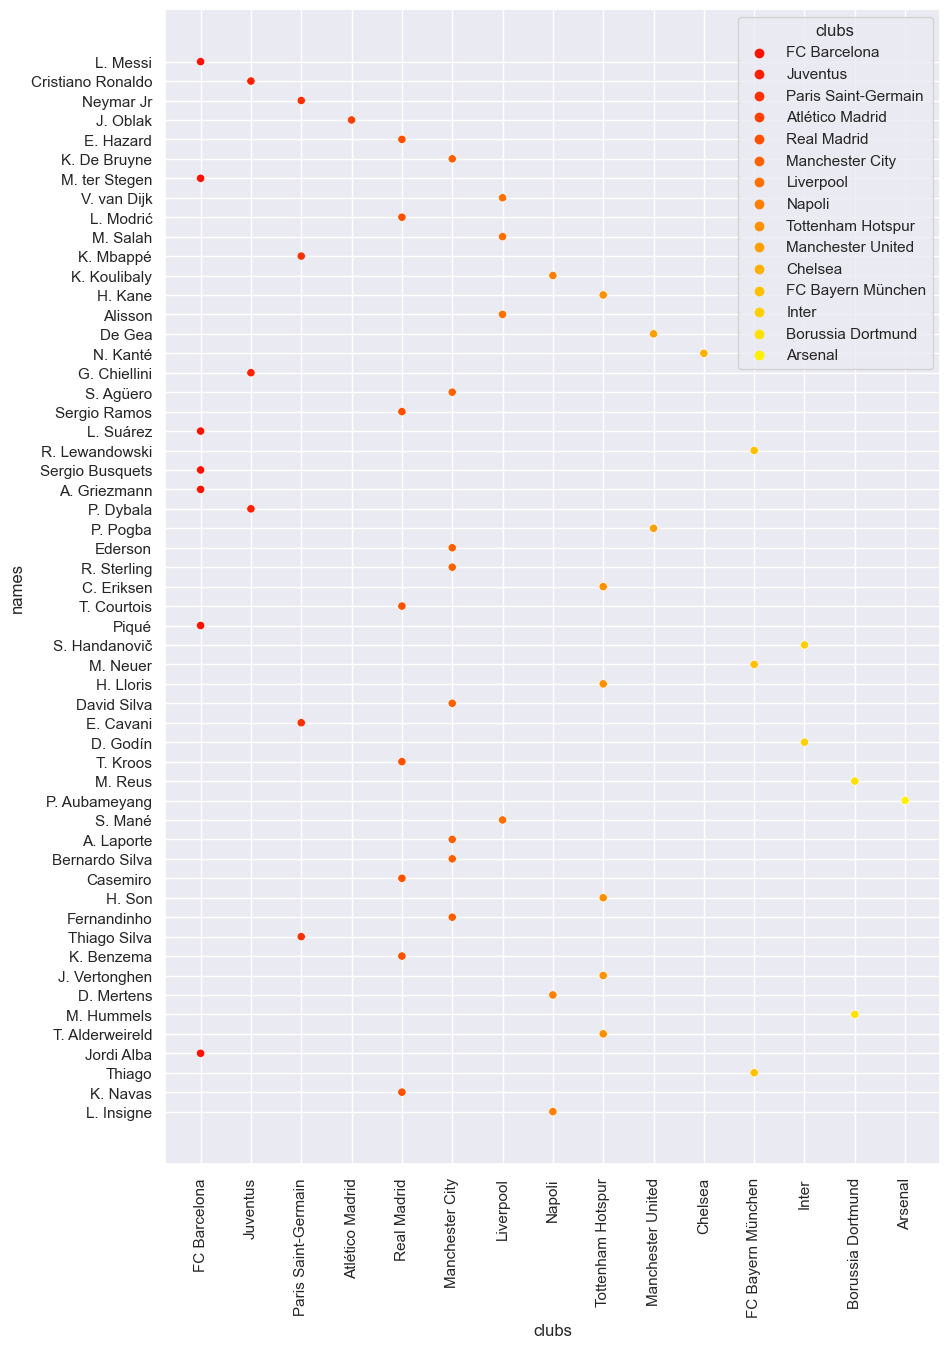

In [58]:
### Visualize the clusters using scatter plots 
plt.figure(figsize=(10,15))
sns.scatterplot(data=reduced1,x='clubs',y='names',palette='autumn',hue='clubs')
plt.xticks(rotation=90)

# Model Creation

In [43]:
# specifying the numner of cluetsrs
kmeans=KMeans(n_clusters=3,random_state=12)

In [44]:
# fit the input data
kmeans=kmeans.fit(reduced)
kmeans

KMeans(n_clusters=3, random_state=12)

In [45]:
# getting labels
labels=kmeans.predict(reduced)
labels

array([1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 2, 1, 1, 2, 0, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1])

In [46]:
# find the centroids
centroids=kmeans.cluster_centers_
centroids

array([[-0.45407322,  1.30035958],
       [-1.06246647, -0.55598712],
       [ 3.86850925, -0.28257802]])

In [47]:
# cluster values
cluster=kmeans.labels_.tolist()
cluster

[1,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 2,
 2,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 1]

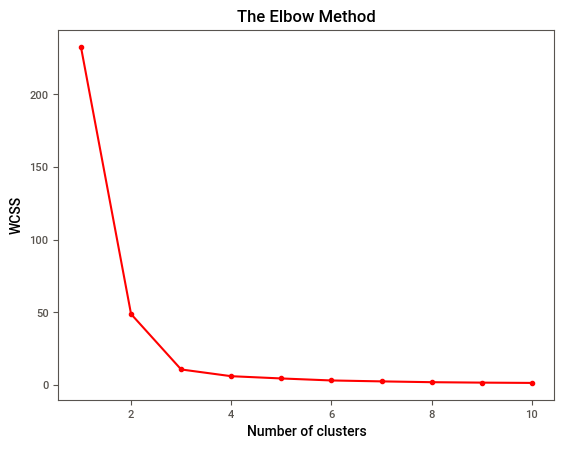

In [48]:
## Applied the K-means clustering algorithm to identify the optimal number of clusters.
from sklearn.cluster import KMeans
wcss=[] #WCSS=Within Cluster Sum of Square.
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(reduced)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='o',color='r')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Finding Silhouette score

In [49]:
#label=labels
#label

from sklearn.metrics import silhouette_score
score=silhouette_score(reduced,labels)
print(f'K-Means Clustering Silhouette score: {score:.2f}')

K-Means Clustering Silhouette score: 0.73


# By Hierarchical Clustering

In [50]:
from sklearn.cluster import AgglomerativeClustering

In [51]:
hierachical_clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

In [52]:
labels1 = hierachical_clustering.fit_predict(reduced)
labels1

array([0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 1, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0], dtype=int64)

In [53]:
score1=silhouette_score(reduced,labels1)
print(f'Hierarchical Clustering Silhouette score: {score1:.2f}')

Hierarchical Clustering Silhouette score: 0.72


# Silhoutte Score

In [54]:
print(f'K-Means Clustering Silhouette score: {score:.2f}')
print(f'Hierarchical Clustering Silhouette score: {score1:.2f}')
print('Both algorithms are performing well but comparitively K-Means clustering perform better than Hierarchical clustering')

K-Means Clustering Silhouette score: 0.73
Hierarchical Clustering Silhouette score: 0.72
Both algorithms are performing well but comparitively K-Means clustering perform better than Hierarchical clustering


## <li>In this model K-Means Clustering Silhouette score is 73%.

# Conclusion

<li> With this dataset we got a Silhouette score of 73% after applying K-Means algorithm.
<li> We did clustering on Players, their Clubs and their Nationality.
<li> List of top 10 countries with most players:
     1)England
     2)Germany
     3)Spain
     4)Brazil
     5)Argentina
     6)France
     7)Italy
     8)Colombia
     9)Mexico
     10)Netherlands
<li> From the graph we can see that Players stops improving after the age of 27 years.
<li> From the graph we can see that the offensive players tends to get paid the most are the Strikers.
    
<li> The analysis of the dataset provided insights into the soccer players' attributes and their relationship with their age and pas tion, it also identified the top countries producing footballers and the type of offersive players that get paid the most. The analysis can help soccer clubs and managers make informed decisions regarding player recruitment and salary negotiations.    